In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from warnings import filterwarnings
filterwarnings("ignore")

2024-09-11 10:46:52.776731: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-11 10:46:56.614004: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-11 10:46:58.621627: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-11 10:47:00.221691: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-11 10:47:00.604465: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-11 10:47:03.291155: I tensorflow/core/platform/cpu_feature_gu

In [2]:
# Loading the mnist dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print("Train set Size: ",x_train.shape,y_train.shape)
print("Test set Size : ",x_test.shape,y_test.shape)

Train set Size:  (60000, 28, 28) (60000,)
Test set Size :  (10000, 28, 28) (10000,)


In [3]:
# Number of classes
num_labels=len(np.unique(y_train))
num_labels

10

In [4]:
x_train[560]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

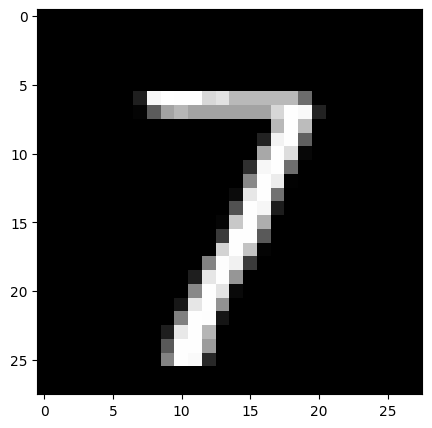

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[560],cmap="gray")

In [6]:
def visualize_img(data,num=10):
    plt.figure(figsize=(5,5))
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(data[i],cmap="gray")
        plt.axis("off")

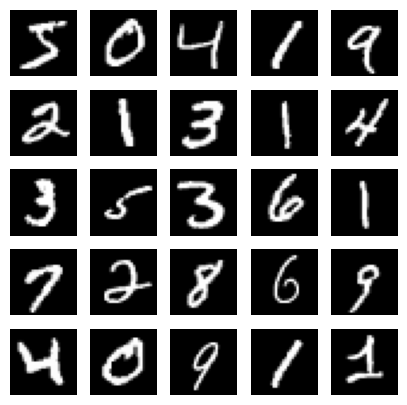

In [9]:
visualize_img(x_train,25)

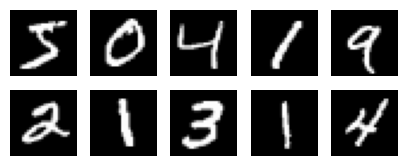

In [11]:
visualize_img(x_train)   # Defalit value 10

In [16]:
def pixel_visualize(img):
    fig=plt.figure(figsize=(12,12))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap="gray")
    width,height=img.shape

    threshold=img.max()/2.5

    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)),xy=(y,x),color="white" if img[x][y]<threshold else "black")

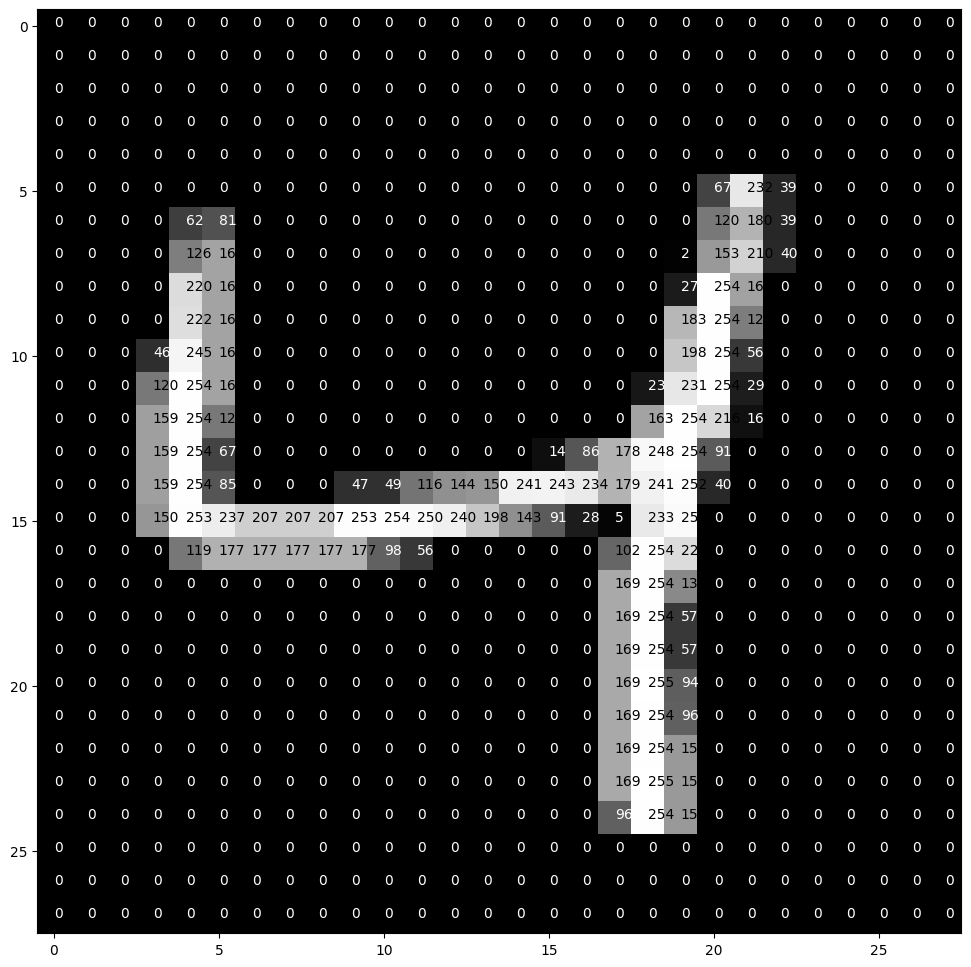

In [17]:
pixel_visualize(x_train[2])

In [ ]:
## Data Pre

In [18]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [19]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [20]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## Reshaping

In [21]:
image_size=x_train.shape[1]
image_size

28

In [22]:
print(f"x_train size :{x_train.shape}\n\nx_test size:{x_test.shape}")

x_train size :(60000, 28, 28)

x_test size:(10000, 28, 28)


In [23]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [24]:
print(f"x_train size:{x_train.shape}\n\nx_test size:{x_test.shape}")

x_train size:(60000, 28, 28, 1)

x_test size:(10000, 28, 28, 1)


## standardization

In [25]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255